<div style="border:solid green 2px; padding: 20px">
<b>Привет, Кирилл!</b>

Меня зовут Алан, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Тобой уже проделана большая работа над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет прният. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания, либо рекоммендации к улучшению. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Определение перспективного тарифа для телеком компании

## Описание проекта:

  Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Цель проекта:

**Выяснить, какой тарифный план приносит больше денег**

## План реализации проекта: <a id='start'></a>

[1. Открыть файлы с данными. Изучить данные. Импортировать библиотеки. Составить предварительный план предобработки данных.](#step_1)<br>
[2. Подготовить данные. Привести данные к нужным типам. Заполнить пропуски.](#step_2) <br>
[3. Добавить необходимые для анализа столбцы.](#step_3)<br>
[4. Проанализировать данные.](#step_4)<br>
[5. Проверить сформулированные гипотезы.](#step_5)<br>
[6. Вывести общий вывод по результатам исследования.](#step_6)

## Шаг 1. Изучение данных<a id='step_1'></a>

Импортируем все необходимые библиотеки:

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Откроем предоставленные данные:

In [3]:
dt_calls = pd.read_csv('/datasets/calls.csv')

In [4]:
dt_int = pd.read_csv('/datasets/internet.csv')

In [5]:
dt_mess = pd.read_csv('/datasets/messages.csv')

In [6]:
dt_tarif = pd.read_csv('/datasets/tariffs.csv')

In [7]:
dt_users = pd.read_csv('/datasets/users.csv')

### Изучим полученные данные. Составим план предобработки.

In [8]:
dt_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [9]:
dt_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**План предобработки dt_calls:**

1. Заменить тип данных call_date на datetime64.
2. Возможно, заменить тип данных id на int64 или float64
3. Проверить данные на дубликаты

In [10]:
dt_int.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [11]:
dt_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**План предобработки dt_int:**

1. Избавиться от дублирующего столбца Unnamed: 0
2. Заменить тип данных session_date на datetime64.
3. Возможно, заменить тип данных id на int64 или float64
4. Проверить данные на дубликаты

In [12]:
dt_mess.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [13]:
dt_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**План предобработки dt_mess:**

1. Заменить тип данных message_date на datetime64.
2. Возможно, заменить тип данных id на int64 или float64
3. Проверить данные на дубликаты

In [14]:
dt_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
dt_tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Здесь все хорошо. Ничего менять не будем.

In [16]:
dt_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [17]:
dt_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**План предобработки dt_users:**

1. Заполнить пропущеные значения churn_date
2. Заменить тип данных reg_date на datetime64
3. Проверить данные на дубликаты

<div class="alert alert-success">

**Комментарий ревьюера:** Отлично, на данном этапе ничего не упущено 👍
</div>

## Шаг 2. Предобработка данных<a id='step_2'></a>

**Предобработка dt_calls**

1. Заменим тип данных столбца с датой:

In [18]:
dt_calls['call_date'] = pd.to_datetime(dt_calls['call_date'], format='%Y-%m-%d')

In [19]:
dt_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


2. Проверим данные на дубликаты:

Здесь в качестве проверки на дубликаты нас интересует только столбец id, т.к. номер каждого события уникален и повторных значений не может быть. В остальных столбцах производить проверку на дубликаты не имеет смысла.

In [20]:
dt_calls['id'].duplicated().sum()

0

**Предобработка dt_int**

1. Избавиться от дублирующего столбца Unnamed: 0
2. Заменить тип данных session_date на datetime64.
3. Возможно, заменить тип данных id на int64 или float64
4. Проверить данные на дубликаты

1. Удалим лишний столбец Unnamed:

In [21]:
del dt_int['Unnamed: 0']

In [22]:
dt_int.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


2. Заменим тип данных в session_date:

In [23]:
dt_int['session_date'] = pd.to_datetime(dt_int['session_date'], format='%Y-%m-%d')

In [24]:
dt_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


3. Проверим данные на дубликаты:

Как и в предыдущем шаге, нас интересует только столбец id по тем же причинам.

In [25]:
dt_int['id'].duplicated().sum()

0

**Предобработка dt_mess**

1. Заменить тип данных message_date на datetime64.
2. Возможно, заменить тип данных id на int64 или float64
3. Проверить данные на дубликаты

1. Заменим тип данных в столбце message_date:

In [26]:
dt_mess['message_date'] = pd.to_datetime(dt_mess['message_date'], format='%Y-%m-%d')

In [27]:
dt_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


2. Проверим данные на дубликаты:

Как и в предыдущем шаге, нас интересует только столбец id по тем же причинам.

In [28]:
dt_mess['id'].duplicated().sum()

0

**Предобработка dt_users**

1. Заполнить пропущеные значения churn_date. Привеcти данные к типу datetime64.
2. Заменить тип данных reg_date на datetime64
3. Проверить данные на дубликаты

1. Разберемся с пропущеными значениями в churn_date:

Мы знаем, пропущеные значения говорят о том, что пользователь пользовался тарифом в момент сбора данных. Поэтому, чтобы в дальнейшем отличать таких пользователей, заполним пропуски текущей датой.

In [29]:
dt_users.churn_date.fillna('2020-01-26', inplace=True)

In [30]:
dt_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Изменим тип данных этого столбца:

In [31]:
dt_users['churn_date'] = pd.to_datetime(dt_users['churn_date'], format='%Y-%m-%d')

In [32]:
dt_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


2. Заменим тип данных в столбце reg_date:

In [33]:
dt_users['reg_date'] = pd.to_datetime(dt_users['reg_date'], format='%Y-%m-%d')

In [34]:
dt_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


3. Проверим данные на дубликаты:

Здесь нас интересуют стобцы user_id и столбцы с именем и фамилией клиента:

In [35]:
dt_users.user_id.duplicated().sum()

0

In [36]:
dt_users[['first_name', 'last_name']].duplicated().sum()

0

Ни одинаковых id, ни одинаковых имен с фамилией не обнаружено. Это говорит о том, что каждый пользователь в dataframe уникален!

<div class="alert alert-success">

**Комментарий ревьюера:** Тут тоже без вопросов, все аккуратно и понятно. 
</div>

## Шаг 3. Добавление столбцов<a id='step_3'></a>

**Необходимо посчитать для каждого пользователя:**

1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам;
4. Помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**1. Количество сделанных звонков и израсходованных минут разговора по месяцам**

Чтобы сгруппировать данные по месяцам, необходимо добавить столбец где будет указан индекс месяца:

In [37]:
dt_calls['month'] = pd.DatetimeIndex(dt_calls['call_date']).month

In [38]:
dt_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Мы помним, что оператор "Мегалайн" всегда округляет время разговора до целых минут в большую сторону. Поэтому, создадим новый столбец dur_rounded куда и запишем округленные вверх значения.

In [39]:
dt_calls['dur_rounded'] = dt_calls['duration'].apply(math.ceil)

<div class="alert alert-warning">

**Комментарий ревьюера:** Можно также использовать альтернативный немного более эффективный метод: прогнать столбец через `np.ceil()` без `.apply()`.
</div>

In [40]:
dt_calls.head()

,id,call_date,duration,user_id,month,dur_rounded
0,1000_0,2018-07-25,0.00,1000,7,0
1,1000_1,2018-08-17,0.00,1000,8,0
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6


Посчитаем количество сделанных пользователем звонков. Для этого создадим сводную таблицу dt_calls_pv сгруппированную по месяцам и пользователям:

In [41]:
dt_calls_pv = dt_calls.pivot_table(index=['user_id', 'month'], values='dur_rounded', aggfunc=['count', 'sum'])

In [42]:
dt_calls_pv.head()

count         sum
              dur_rounded dur_rounded
user_id month                        
1000    5              22         159
        6              43         172
        7              47         340
        8              52         408
        9              58         466

Переименуем столбцы:

In [43]:
dt_calls_pv.columns = ['calls_total', 'minutes_total']

In [44]:
dt_calls_pv.head()

calls_total  minutes_total
user_id month                            
1000    5               22            159
        6               43            172
        7               47            340
        8               52            408
        9               58            466

**2. Количество отправленных сообщений по месяцам**

Добавим к dt_mess столбец с индексом месяца:

In [45]:
dt_mess['month'] = pd.DatetimeIndex(dt_mess['message_date']).month

In [46]:
dt_mess.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Найдем количество отправленных сообщений по месяцам для каждого пользователя:

In [47]:
dt_mess_pv = dt_mess.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

In [48]:
dt_mess_pv.head()

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57

Переименуем столбец:

In [49]:
dt_mess_pv.columns = ['mess_total']

**3. Объем израсходованного интернет-трафика по месяцам**

Добавим к dt_int столбец с индексами месяца:

In [50]:
dt_int['month'] = pd.DatetimeIndex(dt_int['session_date']).month

In [51]:
dt_int.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Мегабайты оператор "Мегалайн" тоже округляет вверх. Поэтому добавим столбец mb_rounded куда запишем посчитанный "Мегалайном" объем израсходанного трафика для каждого пользователя:

In [52]:
dt_int['mb_rounded'] = dt_int['mb_used'].apply(math.ceil)

In [53]:
dt_int.head()

,id,mb_used,session_date,user_id,month,mb_rounded
0,1000_0,112.95,2018-11-25,1000,11,113
1,1000_1,1052.81,2018-09-07,1000,9,1053
2,1000_2,1197.26,2018-06-25,1000,6,1198
3,1000_3,550.27,2018-08-22,1000,8,551
4,1000_4,302.56,2018-09-24,1000,9,303


Как и в предыдущем шаге - сгруппируем необходимые данные в сводную таблицу:

In [54]:
dt_int_pv = dt_int.pivot_table(index=['user_id', 'month'], values='mb_rounded', aggfunc='sum')

In [55]:
dt_int_pv.head()

mb_rounded
user_id month            
1000    5            2256
        6           23257
        7           14016
        8           14070
        9           14581

**4. Помесячная выручка с каждого пользователя**

Для рассчета помесячной выручки, нам потребуются данные из нескольких таблиц. Поэтому, для удобства, объединим таблицы в одну и назовем general_pv: 

In [56]:
general_pv = dt_calls_pv.join([dt_mess_pv, dt_int_pv], lsuffix=['user_id', 'month'], rsuffix=['user_id', 'month'])

In [57]:
general_pv.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
calls_total      3174 non-null float64
minutes_total    3174 non-null float64
mess_total       2678 non-null float64
mb_rounded       3163 non-null float64
dtypes: float64(4)
memory usage: 292.8 KB


Мы обнаружили, что часть данных теперь отсутствует. Это связано с тем, что пользователи реже пользуются смс сообщениями и интернетом, чем звонками. Поэтому, справедливо будет заполнить получившиеся пропуски нулями.

In [58]:
general_pv['mess_total'] = general_pv['mess_total'].fillna(0)

In [59]:
general_pv['mb_rounded'] = general_pv['mb_rounded'].fillna(0)

In [60]:
general_pv.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
calls_total      3174 non-null float64
minutes_total    3174 non-null float64
mess_total       3174 non-null float64
mb_rounded       3174 non-null float64
dtypes: float64(4)
memory usage: 292.8 KB


Теперь, добавим каждому пользователю его тариф. Это поможет нам в дальнейшем присоединить таблицу с описанием каждого тарифа:

Сбросим индексы и назначим новые - по id_пользователя:

In [61]:
general_pv = general_pv.reset_index()

In [62]:
general_pv = general_pv.set_index('user_id')

In [63]:
dt_users = dt_users.set_index('user_id')

In [64]:
general_pv['tariff'] = dt_users['tariff']

Проверим, что все получилось:

In [65]:
general_pv.head()

,month,calls_total,minutes_total,mess_total,mb_rounded,tariff
user_id,,,,,,
1000,5,22.0,159.0,22.0,2256.0,ultra
1000,6,43.0,172.0,60.0,23257.0,ultra
1000,7,47.0,340.0,75.0,14016.0,ultra
1000,8,52.0,408.0,81.0,14070.0,ultra
1000,9,58.0,466.0,57.0,14581.0,ultra


Теперь к каждому тарифу добавим строку с описанием, чтобы можно было вычислить все необходимые данные сразу в одной таблице:

Как и в предыдущем шаге - сбрасываем индексы и присваиваем новые по столбцу tariff

In [66]:
general_pv = general_pv.reset_index()

In [67]:
dt_tarif = dt_tarif.reset_index()

In [68]:
general_pv = general_pv.set_index('tariff')

In [69]:
dt_tarif = dt_tarif.set_index('tariff_name')

In [70]:
general_pv = general_pv.join(dt_tarif)

In [71]:
general_pv = general_pv.reset_index()

In [72]:
general_pv.head()

,level_0,user_id,month,calls_total,minutes_total,mess_total,mb_rounded,index,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,smart,1001,11,59.0,430.0,0.0,18452.0,0,50,15360,500,550,200,3,3
1,smart,1001,12,63.0,414.0,0.0,14053.0,0,50,15360,500,550,200,3,3
2,smart,1002,6,15.0,117.0,4.0,10871.0,0,50,15360,500,550,200,3,3
3,smart,1002,7,26.0,214.0,11.0,17601.0,0,50,15360,500,550,200,3,3
4,smart,1002,8,42.0,289.0,13.0,20347.0,0,50,15360,500,550,200,3,3


Переименуем столбец level_0 на tariff:

In [73]:
general_pv = general_pv.rename(columns={'level_0':'tariff'})

Удалим лишний столбец index полученный после слияния таблиц:

In [74]:
del general_pv['index']

Посчитаем необходимые остатки. Сколько осталось или не осталось таких параметров как: минуты, сообщения, мегабайты:

In [75]:
general_pv['rem_calls'] = general_pv['minutes_included'] - general_pv['minutes_total']

In [76]:
general_pv['rem_mess'] =  general_pv['messages_included'] - general_pv['mess_total']

In [77]:
general_pv['rem_mb'] = general_pv['mb_per_month_included'] - general_pv['mb_rounded']

In [78]:
general_pv.head()

,tariff,user_id,month,calls_total,minutes_total,mess_total,mb_rounded,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rem_calls,rem_mess,rem_mb
0,smart,1001,11,59.0,430.0,0.0,18452.0,50,15360,500,550,200,3,3,70.0,50.0,-3092.0
1,smart,1001,12,63.0,414.0,0.0,14053.0,50,15360,500,550,200,3,3,86.0,50.0,1307.0
2,smart,1002,6,15.0,117.0,4.0,10871.0,50,15360,500,550,200,3,3,383.0,46.0,4489.0
3,smart,1002,7,26.0,214.0,11.0,17601.0,50,15360,500,550,200,3,3,286.0,39.0,-2241.0
4,smart,1002,8,42.0,289.0,13.0,20347.0,50,15360,500,550,200,3,3,211.0,37.0,-4987.0


Теперь напишем функцию, которая посчитает нам количество денег, полученное с каждого клиента в месяц:

In [79]:
def profit(frame):
    if frame['rem_calls'] > 0:
        prof_calls = 0
    else:
        prof_calls = -(frame['rem_calls'] * frame['rub_per_minute'])
    if frame['rem_mess'] > 0:
        prof_mess = 0
    else:
        prof_mess = -(frame['rem_mess'] * frame['rub_per_message'])
    if frame['rem_mb'] > 0:
        prof_mb = 0
    else:
        prof_mb = -(math.floor(frame['rem_mb'] / 1000) * frame['rub_per_gb'])
    return prof_calls + prof_mess + prof_mb + frame['rub_monthly_fee']

<div class="alert alert-warning">

**Комментарий ревьюера:** Верно ведешь расчеты, но при возможности старайся обходиться без `apply()`, так как он ресурсозатратный и равносилен циклу, который проходится по всем строкам/столбцам. Оптимальнее использовать векторизованные операции. Например можно делать нужные тебе расчеты и выборки с помощью `.loc`. В данном случае это не принципиально, но когда данные большие лучше обходиться без `apply()`, векторные операции иногда могут быть в десятки раз быстрее :) 
</div>

Создадим столбец profit, куда и сохраним прибыль с каждого пользователя:

In [80]:
general_pv['profit'] = general_pv.apply(profit, axis=1)

In [81]:
general_pv.head()

,tariff,user_id,month,calls_total,minutes_total,mess_total,mb_rounded,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rem_calls,rem_mess,rem_mb,profit
0,smart,1001,11,59.0,430.0,0.0,18452.0,50,15360,500,550,200,3,3,70.0,50.0,-3092.0,1350.0
1,smart,1001,12,63.0,414.0,0.0,14053.0,50,15360,500,550,200,3,3,86.0,50.0,1307.0,550.0
2,smart,1002,6,15.0,117.0,4.0,10871.0,50,15360,500,550,200,3,3,383.0,46.0,4489.0,550.0
3,smart,1002,7,26.0,214.0,11.0,17601.0,50,15360,500,550,200,3,3,286.0,39.0,-2241.0,1150.0
4,smart,1002,8,42.0,289.0,13.0,20347.0,50,15360,500,550,200,3,3,211.0,37.0,-4987.0,1550.0


Проверим, что мы не потеряли часть таблицы в результате всех преобразований:

In [82]:
general_pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 18 columns):
tariff                   3174 non-null object
user_id                  3174 non-null int64
month                    3174 non-null int64
calls_total              3174 non-null float64
minutes_total            3174 non-null float64
mess_total               3174 non-null float64
mb_rounded               3174 non-null float64
messages_included        3174 non-null int64
mb_per_month_included    3174 non-null int64
minutes_included         3174 non-null int64
rub_monthly_fee          3174 non-null int64
rub_per_gb               3174 non-null int64
rub_per_message          3174 non-null int64
rub_per_minute           3174 non-null int64
rem_calls                3174 non-null float64
rem_mess                 3174 non-null float64
rem_mb                   3174 non-null float64
profit                   3174 non-null float64
dtypes: float64(8), int64(9), object(1)
memory usage: 446.5+ KB


Все хорошо. Двигаемся дальше.

<div class="alert alert-success">

**Комментарий ревьюера:** Ты молодец, все делаешь правильно и аккуратно, твой проект приятно читать.
</div>

## Шаг 4.  Анализ данных <a id='step_4'></a>

Цель: Описать поведение клиентов оператора, исходя из выборки: 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитать среднее количество, дисперсию и стандартное отклонение. 
- Построить гистограммы. 
- Описать распределения.

**Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?**

Будем строить по 2 гистограммы на одном графике для лучшего понимания различий тарифов:

In [83]:
lst_param = ['minutes_total', 'mess_total', 'mb_rounded']
ultra = general_pv.loc[general_pv['tariff'] == 'ultra']
smart = general_pv.loc[general_pv['tariff'] == 'smart']

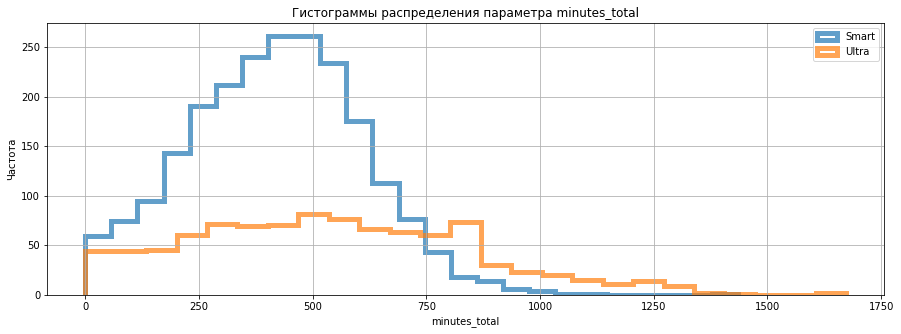

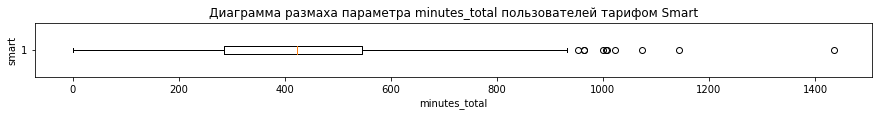

Среднее параметра minutes_total в категории "smart":  419.0629779577148
Дисперсия параметра minutes_total в категории "smart":  35828.06530953033
Стандартное отклонение параметра minutes_total в категории "smart":  189.2830296395594


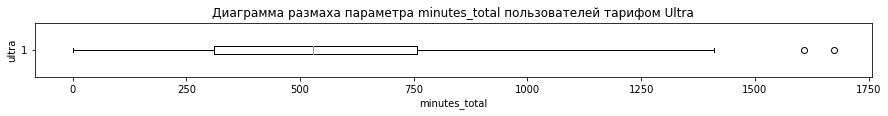

Среднее параметра minutes_total в категории "ultra":  545.4511041009464
Дисперсия параметра minutes_total в категории "ultra":  94104.36117385984
Стандартное отклонение параметра minutes_total в категории "ultra":  306.76434143143143

Общие статистики по двум категориям:
Среднее параметра minutes_total:  456.9316320100819
Дисперсия параметра minutes_total:  56641.03470830063
Стандартное отклонение параметра minutes_total:  237.99377031405805


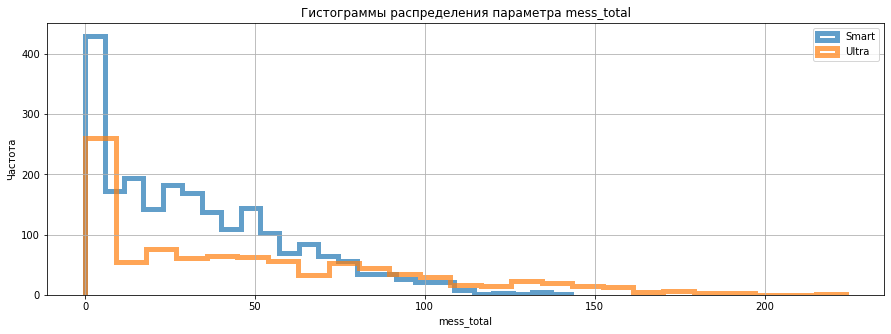

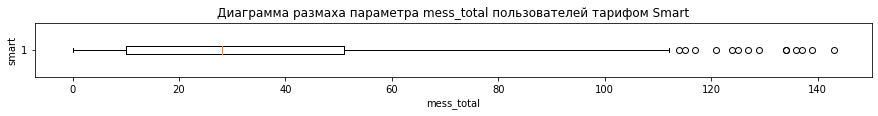

Среднее параметра mess_total в категории "smart":  33.396311291048136
Дисперсия параметра mess_total в категории "smart":  798.2365495963054
Стандартное отклонение параметра mess_total в категории "smart":  28.253080355888727


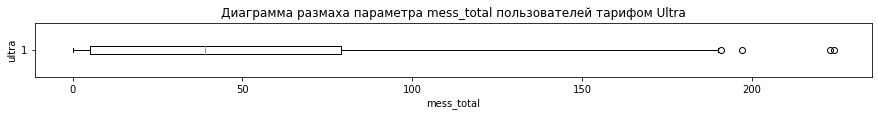

Среднее параметра mess_total в категории "ultra":  49.03364879074658
Дисперсия параметра mess_total в категории "ultra":  2196.4215806926354
Стандартное отклонение параметра mess_total в категории "ultra":  46.865995995952495

Общие статистики по двум категориям:
Среднее параметра mess_total:  38.081600504095775
Дисперсия параметра mess_total:  1268.4769582449399
Стандартное отклонение параметра mess_total:  35.61568416084324


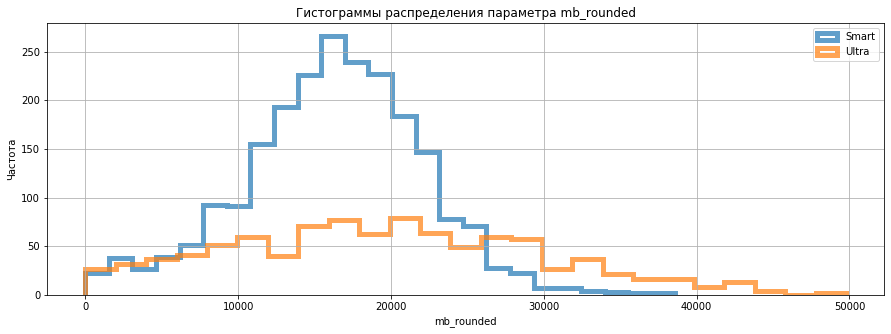

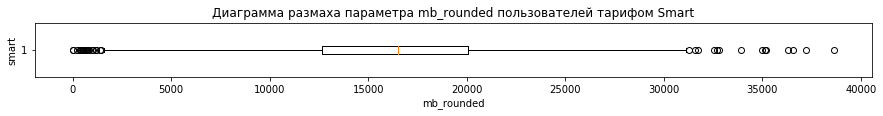

Среднее параметра mb_rounded в категории "smart":  16230.166891587944
Дисперсия параметра mb_rounded в категории "smart":  34598389.87273199
Стандартное отклонение параметра mb_rounded в категории "smart":  5882.039601425002


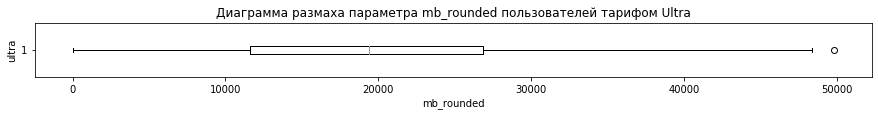

Среднее параметра mb_rounded в категории "ultra":  19480.544689800212
Дисперсия параметра mb_rounded в категории "ultra":  102629879.62760323
Стандартное отклонение параметра mb_rounded в категории "ultra":  10130.640632635394

Общие статистики по двум категориям:
Среднее параметра mb_rounded:  17204.051354757405
Дисперсия параметра mb_rounded:  57199157.49862293
Стандартное отклонение параметра mb_rounded:  7563.012461884678


In [84]:
for param in lst_param:
    ax = smart.plot(kind='hist', y=param, histtype='step', bins=25, linewidth=5, alpha=0.7, label='Smart', figsize=(15, 5))
    ultra.plot(kind='hist', y=param, histtype='step', bins=25, linewidth=5, alpha=0.7, label='Ultra', ax=ax, grid=True, legend=True)
    ax.set_title('Гистограммы распределения параметра ' + param)
    ax.set_xlabel(param)
    ax.set_ylabel('Частота')
    
    plt.figure(figsize=(15, 1))
    plt.boxplot(smart[param], vert=False)
    plt.xlabel(param)
    plt.ylabel('smart')
    plt.title('Диаграмма размаха параметра ' + param + ' пользователей тарифом Smart')
    plt.show()
    print('Среднее параметра ' + param + ' в категории "smart": ', np.mean(smart[param]))
    print('Дисперсия параметра ' + param + ' в категории "smart": ', np.var(smart[param]))
    print('Стандартное отклонение параметра ' + param + ' в категории "smart": ', np.std(smart[param]))
    
    plt.figure(figsize=(15, 1))
    plt.boxplot(ultra[param], vert=False)
    plt.xlabel(param)
    plt.ylabel('ultra')
    plt.title('Диаграмма размаха параметра ' + param + ' пользователей тарифом Ultra')
    plt.show()
    print('Среднее параметра ' + param + ' в категории "ultra": ', np.mean(ultra[param]))
    print('Дисперсия параметра ' + param + ' в категории "ultra": ', np.var(ultra[param]))
    print('Стандартное отклонение параметра ' + param + ' в категории "ultra": ', np.std(ultra[param]))
    print()
    print('Общие статистики по двум категориям:')
    print('Среднее параметра ' + param + ': ', np.mean(general_pv[param]))
    print('Дисперсия параметра ' + param + ': ', np.var(general_pv[param]))
    print('Стандартное отклонение параметра ' + param + ': ', np.std(general_pv[param]))

### Вывод:

**Параметр "количество минут":** Гистограмма пользователей тарифа Smart стремиться к нормальной. Имеет длинный положительный хвост. Около 40% пользователей тарифа Smart - выходят за рамки бесплатного лимита. Большая их часть укладывается в длительность разговоров - 1000 минут в месяц.

График пользователей Ultra не похож на нормальынй. Характеризуется высоким размахом значений. Имеет почти в 2 раза бОльшее стандартное отклонение. Это говорит о том, что для многих тариф Ultra является неэффективным в количестве предоставленных для разговора минут. При этом, сама цифра в 3000 минут завышена, так как никто из пользователей не исчерпал и 1700 минут разговора.

При этом, количество пользователей разговаривающих более 750 минут в месяц и пользующихся тарифом Ultra, в ~2 раза выше чем среди клиентов Smart.

**Параметр "количество смс":** Обе гистограммы имеют схожую форму. Гистограмма Ultra характеризуется меньшей плотностью и более длинным положительным хвостом. При этом оба графика имеют пик около нуля.

Мы наблюдаем, что 75% пользователей пользователей тарифом Smart укладываются в бесплатный лимит -  50 смс.Совсем малое количество людей превышает его более чем в 2 раза. 

Пользователи Ultra пользуются отправляют смс чаще. Мы видим что есть даже те, кто отправляет более 150 сообщений. Среди пользователей Smart таких нет.

**Параметр "объем трафика":** График пользователей Smart стремиться к нормальному. Наблюдаем тонкий положительный хвост. 75% клиентов не прывашают объем израсходонного трафика в 20гб. Около половины тратят в среднем 12гб-20гб. Пик находится как раз где-то в районе 15гб - верхней границы бесплатного лимита.

График тарифа Ultra похож на распределение Стьюдента. Характеризуется толстыми длинными хвостами по бокам. В среднем, пользователи тратят уже 19.5гб трафика. Наблюдается еще большое количество пользователей расходующих больше верхней границы бесплатного лимита в 30гб.

<div class="alert alert-success">

**Комментарий ревьюера:** Отличный, содержательный анализ данных с красивыми и понятными графиками 👍
</div>

## Шаг 4. Проверка гипотез<a id='step_5'></a>

**Необходимо проверить сформулированные гипотезы:**

- Средняя выручка пользователей тарифов "Smart" и "Ultra" различются
- Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

**Проверка гипотезы различной вырочки для тарифов**

Сформулируем нулевую и альтернативную гипотезы:

**Н0:** Выручка пользователей тарифа "Smart" **значимо не различается** с выручкой пользователей тарифа "Ultra"

**Н1:** Выручка пользователей тарифа "Smart" **значимо различается** с выручкой пользователей тарифа "Ultra"

В качестве уровня статистической значимости возьмем наиболее часто используемый **p-value=0.05**

Воспользуемся t-тестом:

In [85]:
results = st.ttest_ind(smart['profit'], ultra['profit']) 

In [87]:
results.pvalue

5.859359959437306e-146

Как мы видим, вероятность получить такой резутат случайно чрезвычайно мала, и ниже выбранного нами p-value.

Для наглядности, представим рассматриваемые параметры графически: <a id='profit_1'></a>

Text(0, 0.5, 'Частота')

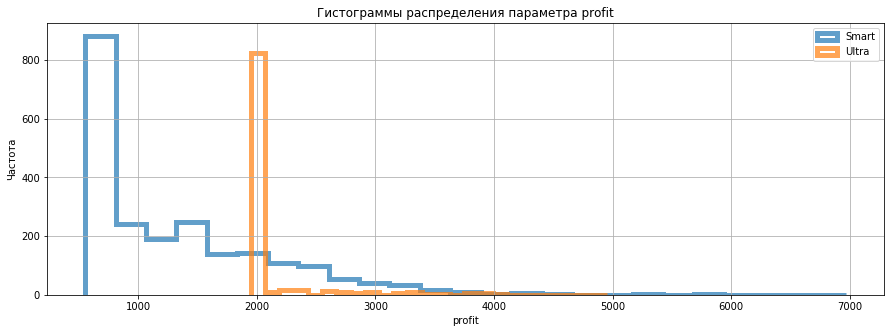

In [88]:
ax = smart.plot(kind='hist', y='profit', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Smart', figsize=(15, 5))
ultra.plot(kind='hist', y='profit', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Ultra', ax=ax, grid=True, legend=True)
ax.set_title('Гистограммы распределения параметра profit')
ax.set_xlabel('profit')
ax.set_ylabel('Частота')

#### Вывод: Отклоняем нулевую гипотезу

Выручка пользователей тарифа "Smart" **значимо различается** с выручкой пользователей тарифа "Ultra"





**Проверка гипотезы различной выручки пользователей из Москвы и пользователей из других регионов**

Сформулируем нулевую и альтернативную гипотезы:

**Н0:** Выручка пользователей из Москвы **значимо не различается** с выручкой пользователей из других регионов"

**Н1:** Выручка пользователей из Москвы **значимо различается** с выручкой пользователей из других регионов"

Сначала добавим необходимый столбец, характеризующий город пользователя:

In [89]:
general_pv = general_pv.set_index('user_id')

In [90]:
general_pv['city'] = dt_users['city']

In [91]:
general_pv.head()

,tariff,month,calls_total,minutes_total,mess_total,mb_rounded,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rem_calls,rem_mess,rem_mb,profit,city
user_id,,,,,,,,,,,,,,,,,,
1001,smart,11,59.0,430.0,0.0,18452.0,50,15360,500,550,200,3,3,70.0,50.0,-3092.0,1350.0,Москва
1001,smart,12,63.0,414.0,0.0,14053.0,50,15360,500,550,200,3,3,86.0,50.0,1307.0,550.0,Москва
1002,smart,6,15.0,117.0,4.0,10871.0,50,15360,500,550,200,3,3,383.0,46.0,4489.0,550.0,Стерлитамак
1002,smart,7,26.0,214.0,11.0,17601.0,50,15360,500,550,200,3,3,286.0,39.0,-2241.0,1150.0,Стерлитамак
1002,smart,8,42.0,289.0,13.0,20347.0,50,15360,500,550,200,3,3,211.0,37.0,-4987.0,1550.0,Стерлитамак


В качестве уровня статистической значимости возьмем как и в предыдущем шаге **p-value=0.05**

Воспользуемся t-тестом:

In [92]:
results = st.ttest_ind(general_pv.query('city == "Москва"')['profit'], general_pv.query('city != "Москва"')['profit']) 

In [93]:
results.pvalue

0.5025458111268286

Полученный ровень статистической значимости **0.5 > 0.05**

Для наглядности, снова представим рассматриваемые параметры графически:

Text(0, 0.5, 'Частота')

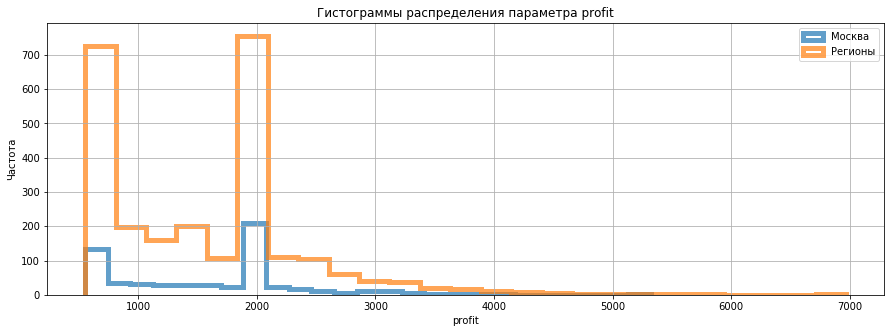

In [94]:
ax = general_pv.query('city == "Москва"').plot(kind='hist', y='profit', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Москва', figsize=(15, 5))
general_pv.query('city != "Москва"').plot(kind='hist', y='profit', histtype='step', bins=25, linewidth=5, alpha=0.7, label='Регионы', ax=ax, grid=True, legend=True)
ax.set_title('Гистограммы распределения параметра profit')
ax.set_xlabel('profit')
ax.set_ylabel('Частота')

#### Вывод: Нет причин отклонять нулевую гипотезу

Выручка пользователей из Москвы **значимо не различается** с выручкой пользователей из других регионов"

### Ответ на главный вопрос исследования

Выясним какой тариф в среднем приносит больше денег. В качастве оценочного параметра воспользуемся средним значением. Потому, что на [графике](#profit_1) видно: больше денег, в среднем, приносят пользователи тарифом Ultra. При этом, подавляющее большинство из них, не может израсходовать весь бесплатный пакет, поэтому вся выручка ограничивается ежемесячной платой за тариф. У пользователей тарифом Smart другая ситуация: 74% пользователей выходят за рамки бесплатного пакета, что часто приносит бОльший ежемесячный доход с клиента.

Среднее значение как раз учитывает такую особенность и поможет корректно оценить какой из тарифов выгоднее для оператора:

In [95]:
smart['profit'].mean()

1306.3657219973009

In [96]:
ultra['profit'].mean()

2073.97476340694

**Вывод:** Несмотря на изложенные выше особенности, **выгоднее** все-таки более дорогой **тариф Ultra.**

<div class="alert alert-success">

**Комментарий ревьюера:** Ты продержался молодцом на протяжении всего проекта :) 
</div>

## Общий вывод:<a id='step_6'></a>

Мной было проведено исследование пользователей различными тарифами оператора "Мегалайн".

По результатам исследования выявлены значимые статистические различия в выручке пользователей разных тарифов. При этом, между выручкой пользователей из различных регионов и пользователей из Москвы значимых различий нет.

Выявлено, что более выгодным для оператора связи является тариф Ultra.

<div class="alert alert-warning">

**Комментарий ревьюера:** Можно немного расширить вывод и добавить в него краткий перечень выполненных шагов и находок в исследовании.
</div>

<div class="alert alert-success">

**Вывод:** Ты проделал огромную работу и у тебя получился реально крутой проект, каждый шаг в нем мне понравился по своему. С радостью сообщаю, что твой проект принят и желаю тебе дальнейших успехов! Продолжай в том же духе! :) 
</div>

[К началу](#start)